In [1]:
!pip install qiskit qiskit-aer matplotlib -q
!pip install pylatexenc
!pip install qiskit qiskit-aer

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


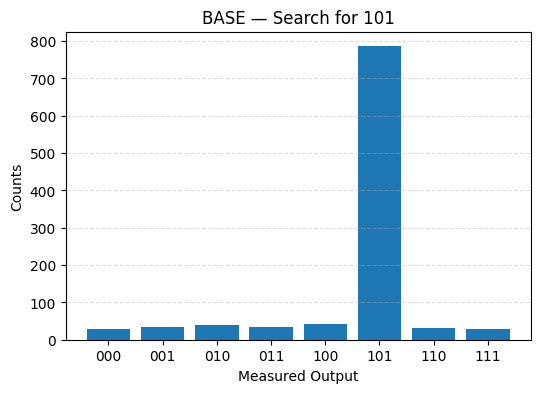

Counts: {'001': 35, '111': 30, '011': 33, '110': 31, '100': 41, '000': 29, '010': 39, '101': 786}


In [3]:
def plot_counts(counts, title="Histogram"):
    labels = sorted(counts.keys())
    values = [counts[k] for k in labels]

    plt.figure(figsize=(6,4))
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels)
    plt.xlabel("Measured Output")
    plt.ylabel("Counts")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

def run(qc, shots=1024, title="Result"):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    counts = result.get_counts()
    plot_counts(counts, title)
    print("Counts:", counts)

def grover_3qubit(marked_state="101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))  # initialization
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_3qubit("101")
print(qc.draw())
run(qc, title="BASE — Search for 101")



Searching for: 111


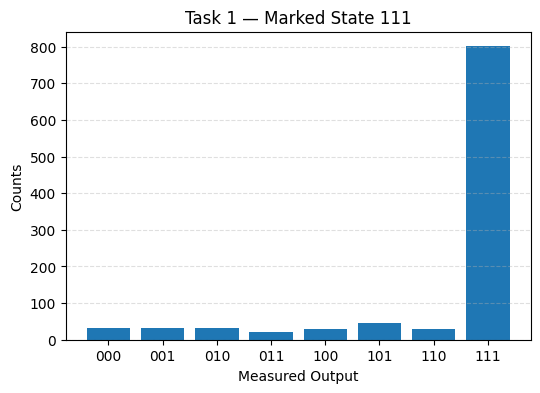

Counts: {'001': 33, '101': 46, '110': 29, '000': 33, '010': 32, '100': 30, '011': 20, '111': 801}

Searching for: 010


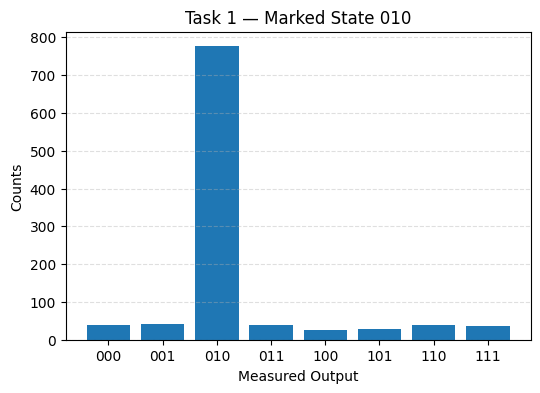

Counts: {'100': 26, '101': 28, '001': 42, '110': 39, '111': 35, '011': 40, '000': 38, '010': 776}


In [4]:
#Task 1: Change marked state
for state in ["111", "010"]:
    print("\nSearching for:", state)
    qc = grover_3qubit(state)
    run(qc, title=f"Task 1 — Marked State {state}")

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3 


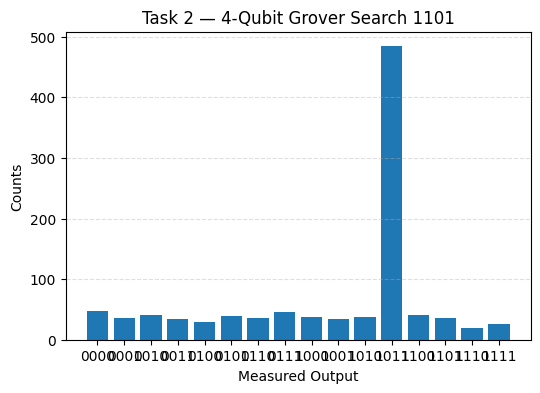

Counts: {'1110': 20, '1011': 484, '0111': 46, '0011': 35, '1111': 26, '0001': 36, '1010': 38, '0110': 36, '1000': 38, '1100': 40, '0000': 47, '0010': 40, '1101': 36, '1001': 34, '0101': 39, '0100': 29}


In [5]:
#Task 2 - Extend to 4 qubits
def grover_4qubit(marked_state="1101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_4qubit("1101")
print(qc.draw())
run(qc, title="Task 2 — 4-Qubit Grover Search 1101")


     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               »
«q_0: ┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──»
«     ├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  »
«q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────

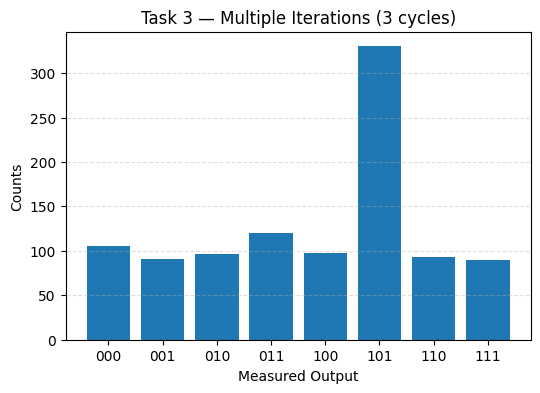

Counts: {'101': 330, '110': 93, '000': 106, '010': 96, '100': 98, '001': 91, '111': 90, '011': 120}


In [6]:
#Task 3 - Multiple grover iterations for strong probability
def grover_iterations(marked_state="101", iterations=2):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    qc.measure(range(n), range(n))
    return qc

qc = grover_iterations("101", iterations=3)
print(qc.draw())
run(qc, title="Task 3 — Multiple Iterations (3 cycles)")

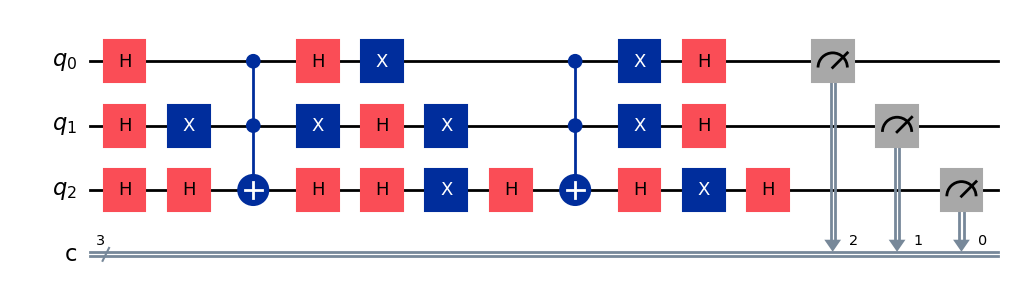

Counts = {'010': 68, '000': 72, '001': 68, '100': 71, '110': 77, '011': 60, '111': 59, '101': 1573}


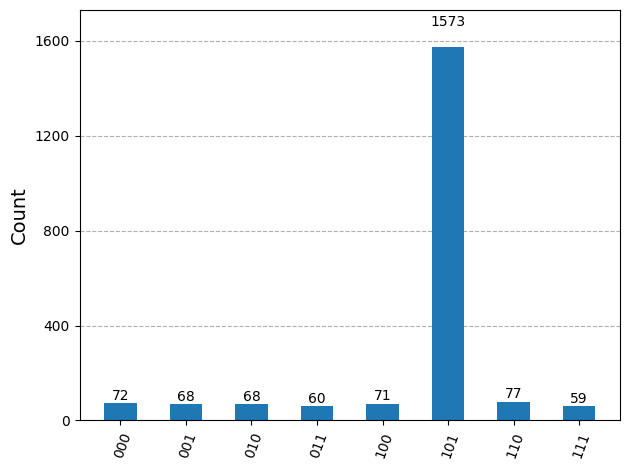

In [7]:
# Task 4 : Circuit Visualization with mpl

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)


    qc.measure(range(n), range(n)[::-1])
    return qc

marked_state = "101"
qc = grover_search(marked_state)

display(qc.draw("mpl"))

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()

counts = result.get_counts()
print("Counts =", counts)

display(plot_histogram(counts))


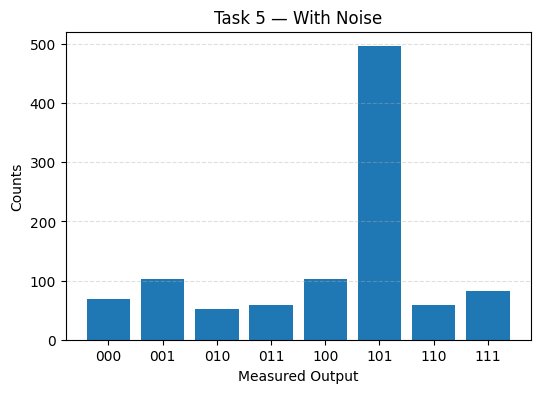

Counts: {'100': 103, '001': 103, '110': 59, '010': 52, '000': 69, '111': 83, '011': 59, '101': 496}


In [8]:
#Task 5 - Noise addition
from qiskit_aer.noise import NoiseModel, depolarizing_error

def run_with_noise(qc):
    noise = NoiseModel()
    noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h','x'])
    noise.add_all_qubit_quantum_error(depolarizing_error(0.10, 2), ['mcx'])

    sim = AerSimulator(noise_model=noise)
    tqc = transpile(qc, sim)

    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    plot_counts(counts, "Task 5 — With Noise")
    print("Counts:", counts)

qc = grover_3qubit("101")
run_with_noise(qc)
counts_noisy = counts


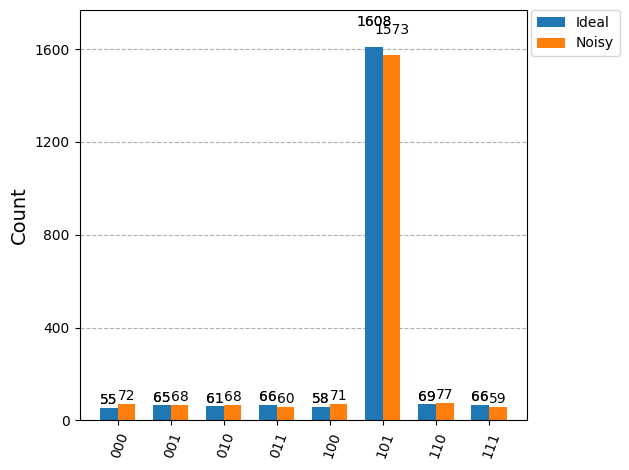

In [9]:
#Task 6 - Real hardware execution

from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

sim_ideal = Aer.get_backend('qasm_simulator')

tqc2 = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(tqc2, shots=2048).result()
counts_ideal = result_ideal.get_counts()

plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])